In [17]:
# Compare Algorithms
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict,cross_val_score
from sklearn.metrics import confusion_matrix,f1_score,precision_score,recall_score
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
# load dataset
df=pd.read_excel('MORE_NOISE.xlsx')
df.head()

,avg_ratio,label,Unnamed: 2,Unnamed: 3
0,0.505528,10,NaN,NaN
1,0.502515,10,NaN,NaN
2,0.503796,10,NaN,NaN
3,0.503061,10,NaN,NaN
4,0.506830,10,NaN,NaN


In [18]:
df.drop(columns=['Unnamed: 2','Unnamed: 3'],axis=0, inplace=True)
array = df.values
irr=df['avg_ratio']
tar=df['label']
x=array[:,0:]
y=array[:,1]

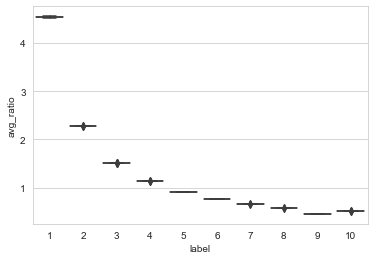

In [21]:
import seaborn as sns
sns.set_style("whitegrid") 
  
z=sns.boxplot(x = 'label', y = 'avg_ratio', data = df) 

In [28]:
df.groupby(['label']).describe()

avg_ratio                                                              \
          count      mean       std       min       25%       50%       75%   
label                                                                         
1         100.0  4.540632  0.006352  4.524306  4.536043  4.540119  4.545245   
2         100.0  2.273052  0.002696  2.267585  2.271479  2.272665  2.274868   
3         100.0  1.515152  0.000903  1.511868  1.514677  1.515126  1.515610   
4         100.0  1.135010  0.000947  1.131912  1.134416  1.134889  1.135592   
5         100.0  0.908907  0.000983  0.906410  0.908238  0.908929  0.909565   
6         100.0  0.757878  0.000944  0.755796  0.757135  0.757918  0.758514   
7         100.0  0.649030  0.000918  0.647102  0.648444  0.648892  0.649527   
8         100.0  0.567983  0.000900  0.565238  0.567433  0.568040  0.568587   
9         100.0  0.454143  0.001059  0.451541  0.453523  0.454145  0.455047   
10        100.0  0.504711  0.000936  0.502435  0.504158  0.504721  0.505269   

                 
            max  
label            
1      4.556400  
2      2.280766  
3      1.517224  
4      1.137521  
5      0.911295  
6      0.760179  
7      0.651809  
8      0.569890  
9      0.456395  
10     0.507094

# RF

In [3]:
rf=RandomForestClassifier()
rf.fit(x,y)
rf_score=cross_val_score(rf,x,y,cv=10,scoring='accuracy')
rf_score.mean()

1.0

In [4]:
rf_ypred=cross_val_predict(rf,x,y,cv=10)

In [5]:
confusion_matrix(y,rf_ypred)

array([[100,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 100,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 100,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 100,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 100,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 100,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 100,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 100,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 100,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 100]], dtype=int64)

In [6]:
precision_score(y,rf_ypred,average='weighted')

1.0

In [7]:
recall_score(y,rf_ypred,average='weighted')

1.0

In [8]:
f1_score(y,rf_ypred,average='weighted')

1.0

# CART

In [9]:
dt=DecisionTreeClassifier()
dt.fit(x,y)
dt_score=cross_val_score(dt,x,y,cv=10,scoring='accuracy')
dt_score.mean()

1.0

In [10]:
dt_ypred=cross_val_predict(dt,x,y,cv=10)

In [11]:
confusion_matrix(y,dt_ypred)

array([[100,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 100,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 100,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 100,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 100,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 100,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 100,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 100,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 100,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 100]], dtype=int64)

In [12]:
precision_score(y,dt_ypred,average='weighted')

1.0

In [13]:
recall_score(y,dt_ypred,average='weighted')

1.0

In [14]:
f1_score(y,dt_ypred,average='weighted')

1.0

# Naive Bayes

In [15]:
nb=GaussianNB()
nb.fit(x,y)
nb_score=cross_val_score(dt,x,y,cv=10,scoring='accuracy')
nb_score.mean()

1.0

In [16]:
nb_ypred=cross_val_predict(nb,x,y,cv=10)

In [17]:
confusion_matrix(y,nb_ypred)

array([[100,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 100,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 100,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 100,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 100,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 100,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 100,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 100,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 100,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 100]], dtype=int64)

In [18]:
precision_score(y,nb_ypred,average='weighted')

1.0

In [19]:
recall_score(y,nb_ypred,average='weighted')

1.0

In [20]:
f1_score(y,nb_ypred,average='weighted')

1.0